In [32]:
import pandas as pd
import numpy as np
import dropbox
import os
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [4]:
# class Point():
#     def __init__(self, x, y):
#         self.x = x
#         self.y = y

#     def __repr__(self):
#         return 'Point({0},{1})'.format(self.x,self.y)

#     def translate(self, dx, dy):
#         "Add dx and dy to the point."
#         self.x += dx
#         self.y += dy

# e = Point(1.5, 2.5)

In [11]:
dbx = dropbox.Dropbox(os.environ['DROPBOX_API'])
dbx.users_get_current_account()

FullAccount(account_id='dbid:AABT1H-NJgK-ns_10QubSjssbwKMHtznqDU', name=Name(given_name='saurav', surname='chowdhury', familiar_name='saurav', display_name='saurav chowdhury', abbreviated_name='SC'), email='saurav13iitr@gmail.com', email_verified=True, disabled=False, locale='en', referral_link='https://www.dropbox.com/referrals/AADGzvUD1naruTWe92WGn9EaGcI-C2M2Zfg?src=app9-7501328', is_paired=False, account_type=AccountType('basic', None), root_info=UserRootInfo(root_namespace_id='884484377', home_namespace_id='884484377'), profile_photo_url=None, country='IN', team=None, team_member_id=None)

In [12]:
years = list(range(2002, 2020))
final_df = pd.DataFrame()

for year in years:
    path= "/Saurav/data/Stage_Specific_Ranking_-_Table_data"
    _, res = dbx.files_download(path+str(year)+".csv")
    df=pd.read_csv(res.raw)
    final_df = pd.concat([df,final_df])

final_df.shape

(21726, 114)

In [13]:
len(final_df['Athlete/Comp'].unique()) ## Unique ID for athele => Data at Athlete X Country X Competetion X Round lvl

21726

In [14]:
filtered_data = final_df.loc[:, ['Athlete/Comp','Metric','Finish','Gender','Temp - Air','Judge 1 Score','Judge 2 Score',
                          'Judge 3 Score','Judge 4 Score','Judge 5 Score','Judge 6 Score - 1','Judge 7 Score - 1',
                          'Major Finalist','Major Medalist','Nation','Olympic Finalist','Olympic Medalist','Temp - Snow',
                          'Season','Season/Comp','Round','Wind']]

filtered_data['age_yrs'] = 2020 - final_df['yob']
filtered_data['Athlete_name'] =  final_df['Athlete/Comp'].str.extract(r"(.*-....).-", expand=False)

filtered_data.head()

,Athlete/Comp,Metric,Finish,Gender,Temp - Air,Judge 1 Score,Judge 2 Score,Judge 3 Score,Judge 4 Score,Judge 5 Score,...,Nation,Olympic Finalist,Olympic Medalist,Temp - Snow,Season,Season/Comp,Round,Wind,age_yrs,Athlete_name
0,CROTTY Lexi - USA - North American Cup 1 - 201...,52.48,17,Women,0.0,13.6,14.3,13.0,14.3,15.0,...,USA,0,0,0.0,2019,2019-North American Cup 1,Qualification 1,0.0,20.0,CROTTY Lexi - USA
1,ITO Miki - JPN - Canadian Selections 2 - 2019 ...,70.56,4,Women,0.0,17.1,16.8,17.7,16.9,16.3,...,JPN,0,0,0.0,2019,2019-Canadian Selections 2,Qualification 1,0.0,33.0,ITO Miki - JPN
2,DZIEMIAN Nessa - USA - World Cup 1 - 2019 - Qu...,64.89,21,Women,-3.0,14.0,14.6,15.0,14.9,15.0,...,USA,0,0,-1.0,2019,2019-World Cup 1,Qualification 1,0.0,26.0,DZIEMIAN Nessa - USA
3,FJALLSTROM Ludvig - SWE - World Cup 5 - 2019 -...,70.56,23,Men,-19.0,15.0,15.5,16.1,16.4,15.8,...,SWE,0,0,-3.0,2019,2019-World Cup 5,Qualification 1,0.0,27.0,FJALLSTROM Ludvig - SWE
4,MYSKO Alex - CAN - Canada Cup 1 - 2019 - Quali...,66.93,18,Men,-22.0,15.4,15.8,15.8,15.5,15.5,...,CAN,0,0,0.0,2019,2019-Canada Cup 1,Qualification 1,0.0,NaN,MYSKO Alex - CAN


In [58]:
# categorical = ['Athlete/Comp', 'Gender', 'Major Finalist','Major Medalist','Nation','Olympic Finalist','Olympic Medalist', 
#                'Season','Season/Comp']

# numerical = ['Metric','Finish','Temp - Air','Judge 1 Score','Judge 2 Score','Judge 3 Score','Judge 4 Score',
#              'Judge 5 Score','Judge 6 Score - 1','Judge 7 Score - 1','Temp - Snow','Wind','age_yrs']

# len(categorical) + len(numerical) == len(filtered_data.columns)


True

In [15]:
(filtered_data['age_yrs'] < 0).any() == True

False

In [16]:
filtered_data.columns = filtered_data.columns.str.replace("/","_").str.replace("\ -\ ","_").str.replace("\ ","_")

In [17]:
filtered_data.columns

Index(['Athlete_Comp', 'Metric', 'Finish', 'Gender', 'Temp_Air',
       'Judge_1_Score', 'Judge_2_Score', 'Judge_3_Score', 'Judge_4_Score',
       'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Major_Finalist',
       'Major_Medalist', 'Nation', 'Olympic_Finalist', 'Olympic_Medalist',
       'Temp_Snow', 'Season', 'Season_Comp', 'Round', 'Wind', 'age_yrs',
       'Athlete_name'],
      dtype='object')

In [21]:
#filtering the finals only
filtered_data = filtered_data[filtered_data['Round'].str.lower().str.extract(r'.*(final).*', expand=False).notnull()]

print(filtered_data.shape)
#dividing competition data into 3 levels
tier1_df = filtered_data[filtered_data['Season_Comp'].str.lower().str.extract(r'.*(world).*', expand=False).notnull() |\
                 filtered_data['Season_Comp'].str.lower().str.extract(r'.*(olympics).*', expand=False).notnull()]

print(tier1_df.shape)

tier2_df = filtered_data[filtered_data['Season_Comp'].str.lower().str.extract(r'.*(north american).*', expand=False).notnull()]
print(tier2_df.shape)

tier3_df = filtered_data[filtered_data['Season_Comp'].str.lower().str.extract(r'.*(canad).*', expand=False).notnull()]
print(tier3_df.shape)

print(tier1_df.shape[0]+tier2_df.shape[0]+tier3_df.shape[0])

(6430, 24)
(4765, 24)
(1494, 24)
(171, 24)
6430


In [22]:
tier1_df = tier1_df.loc[:, ['Athlete_Comp', 'Athlete_name', 'Gender', 'age_yrs', 'Nation', 'Judge_1_Score', 'Judge_2_Score', 
                    'Judge_3_Score', 'Judge_4_Score', 'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Major_Finalist',
                    'Major_Medalist', 'Olympic_Finalist', 'Olympic_Medalist','Temp_Snow', 'Temp_Air','Wind',
                    'Season', 'Season_Comp', 'Round', 'Metric', 'Finish']]

tier2_df= tier2_df.loc[:, ['Athlete_Comp', 'Athlete_name', 'Gender', 'age_yrs', 'Nation', 'Judge_1_Score', 'Judge_2_Score', 
                    'Judge_3_Score', 'Judge_4_Score', 'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Major_Finalist',
                    'Major_Medalist', 'Olympic_Finalist', 'Olympic_Medalist','Temp_Snow', 'Temp_Air','Wind',
                    'Season', 'Season_Comp', 'Round', 'Metric', 'Finish']]

tier3_df= tier3_df.loc[:, ['Athlete_Comp', 'Athlete_name', 'Gender', 'age_yrs', 'Nation', 'Judge_1_Score', 'Judge_2_Score', 
                    'Judge_3_Score', 'Judge_4_Score', 'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Major_Finalist',
                    'Major_Medalist', 'Olympic_Finalist', 'Olympic_Medalist','Temp_Snow', 'Temp_Air','Wind',
                    'Season', 'Season_Comp', 'Round', 'Metric', 'Finish']]

tier1_df = tier1_df.rename(columns = {'Athlete_Comp' : 'Athlete_Comp_ID', 'Finish' : 'Finish_Rank', 'Metric' : 'Score_Metric'})
tier2_df = tier2_df.rename(columns = {'Athlete_Comp' : 'Athlete_Comp_ID', 'Finish' : 'Finish_Rank', 'Metric' : 'Score_Metric'})
tier3_df = tier3_df.rename(columns = {'Athlete_Comp' : 'Athlete_Comp_ID', 'Finish' : 'Finish_Rank', 'Metric' : 'Score_Metric'})

In [27]:
tier3_df['Gender'].unique()

array(['Men', 'Women'], dtype=object)

In [30]:
# Dividing into men and women
tier1_df_M = tier1_df[tier1_df['Gender'] == "Men"]
tier1_df_W = tier1_df[tier1_df['Gender'] == "Women"]
tier2_df_M = tier2_df[tier2_df['Gender'] == "Men"]
tier2_df_W = tier2_df[tier2_df['Gender'] == "Women"]
tier3_df_M = tier3_df[tier3_df['Gender'] == "Men"]
tier3_df_W = tier3_df[tier3_df['Gender'] == "Women"]


In [31]:
tier1_df_M.to_csv("../data/tier_1_comp_data_men.csv", index = False)
tier2_df_M.to_csv("../data/tier_2_comp_data_men.csv", index = False)
tier3_df_M.to_csv("../data/tier_3_comp_data_men.csv", index = False)

tier1_df_W.to_csv("../data/tier_1_comp_data_women.csv", index = False)
tier2_df_W.to_csv("../data/tier_2_comp_data_women.csv", index = False)
tier3_df_W.to_csv("../data/tier_3_comp_data_women.csv", index = False)

### Data Cleaning starts..

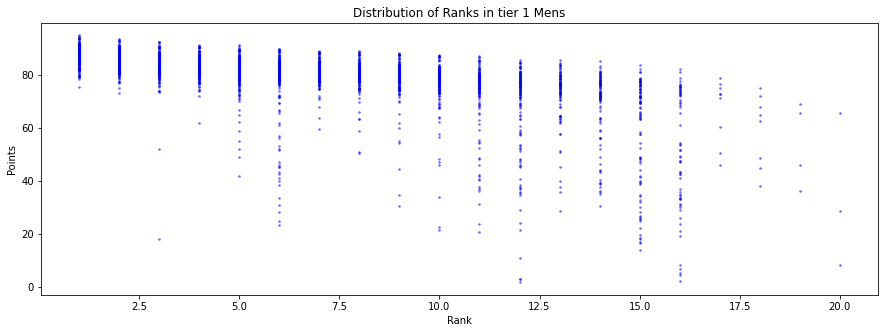

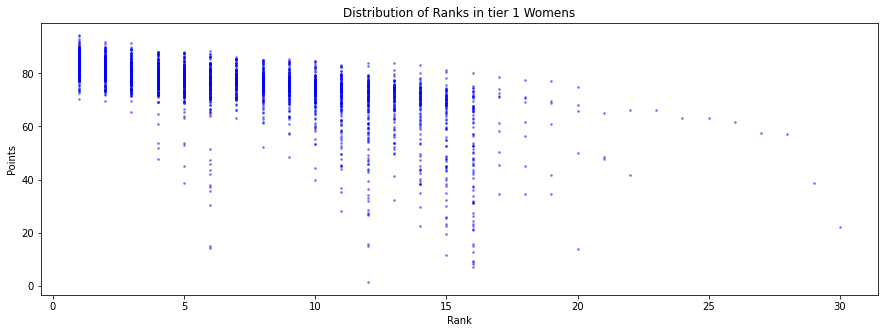

In [45]:
plt.figure(figsize = (15,5))
plt.scatter(tier1_df_M['Finish_Rank'], tier1_df_M['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 1 Mens")
plt.show()

plt.figure(figsize = (15,5))
plt.scatter(tier1_df_W['Finish_Rank'], tier1_df_W['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 1 Womens")
plt.show()

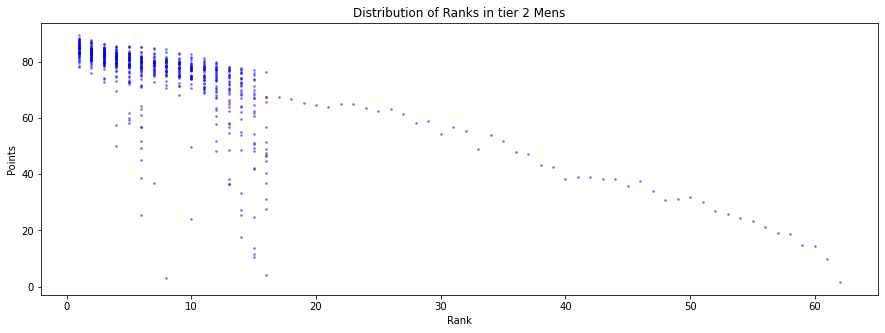

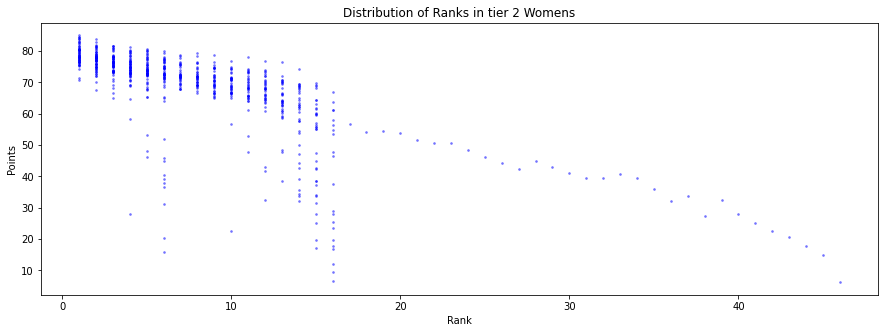

In [44]:
plt.figure(figsize = (15,5))
plt.scatter(tier2_df_M['Finish_Rank'], tier2_df_M['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 2 Mens")
plt.show()

plt.figure(figsize = (15,5))
plt.scatter(tier2_df_W['Finish_Rank'], tier2_df_W['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 2 Womens")
plt.show()

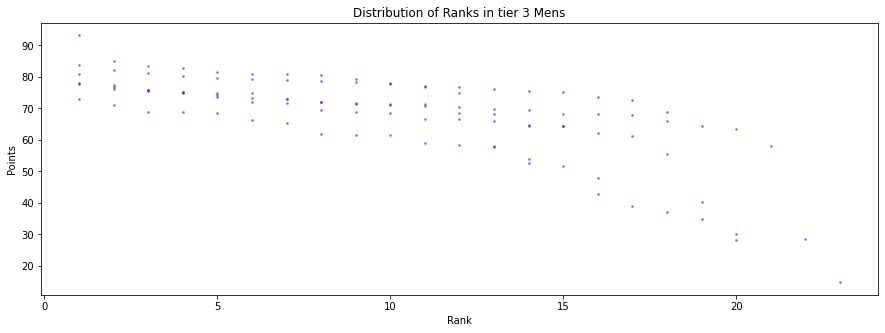

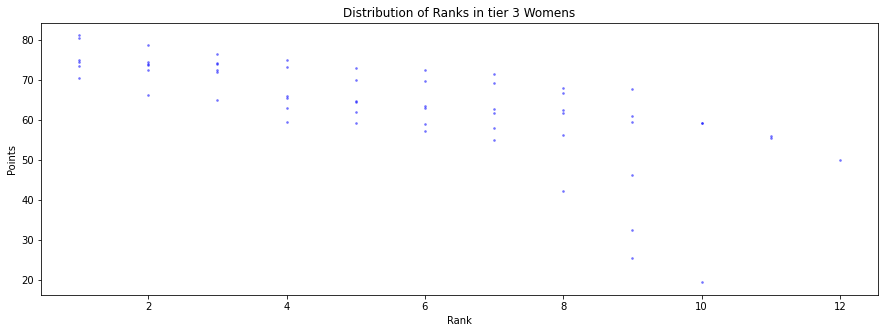

In [43]:
plt.figure(figsize = (15,5))
plt.scatter(tier3_df_M['Finish_Rank'], tier3_df_M['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 3 Mens")
plt.show()

plt.figure(figsize = (15,5))
plt.scatter(tier3_df_W['Finish_Rank'], tier3_df_W['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 3 Womens")
plt.show()

In [52]:
tier1_df_M.columns

Index(['Athlete_Comp_ID', 'Athlete_name', 'Gender', 'age_yrs', 'Nation',
       'Judge_1_Score', 'Judge_2_Score', 'Judge_3_Score', 'Judge_4_Score',
       'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Major_Finalist',
       'Major_Medalist', 'Olympic_Finalist', 'Olympic_Medalist', 'Temp_Snow',
       'Temp_Air', 'Wind', 'Season', 'Season_Comp', 'Round', 'Score_Metric',
       'Finish_Rank'],
      dtype='object')

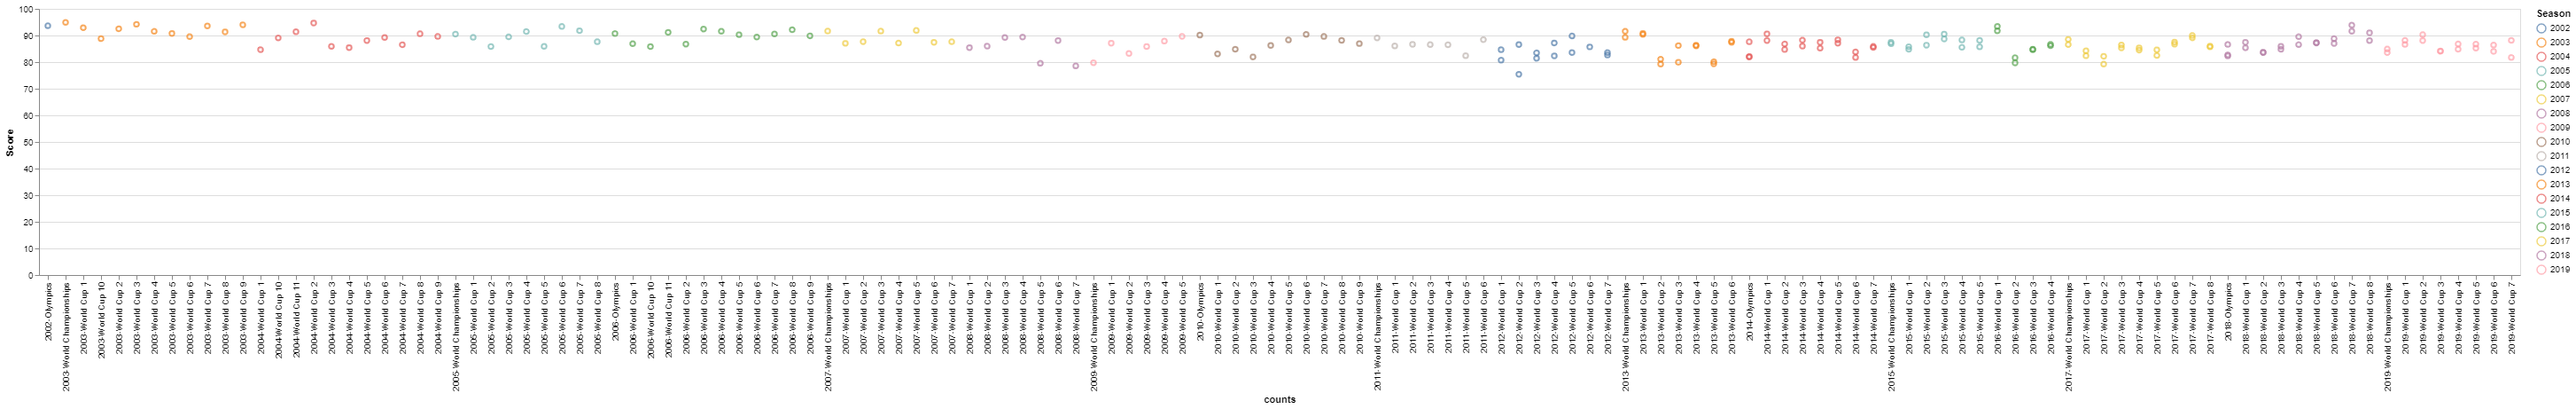

In [70]:
alt.Chart(tier1_df_M).mark_point().encode(
    alt.Y('Score_Metric:Q', title = "Score"),
    alt.X('Season_Comp:N', title = "counts"),
    alt.Color('Season:N')
).transform_filter(
    "(datum.Finish_Rank == 1)"
)

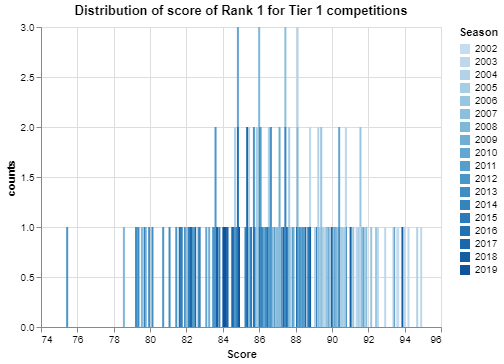

In [123]:
alt.Chart(tier1_df_M).mark_bar(size = 2).encode(
    alt.X('Score_Metric:Q', title = "Score"),
    alt.Y('count()', title = "counts"),
    alt.Color('Season:O'),
    tooltip = ['Season']
).transform_filter(
    "(datum.Finish_Rank == 1)"
).properties(title = "Distribution of score of Rank 1 for Tier 1 competitions")

In [80]:
from scipy.stats import norm

In [88]:
tier1_mean = tier1_df_M[tier1_df_M['Finish_Rank'] == 1].loc[:, 'Score_Metric'].mean()
tier1_std = tier1_df_M[tier1_df_M['Finish_Rank'] == 1].loc[:, 'Score_Metric'].std()
tier1_mean

86.98412060301504

In [105]:
tier1_df_M[(tier1_df_M['Finish_Rank'] == 1) & (tier1_df_M['Season'] == 2010)].loc[:, 'Score_Metric']

33      83.09
191     90.40
555     86.96
848     81.95
886     88.16
927     90.13
1025    84.83
1300    86.27
1420    88.32
1520    89.63
Name: Score_Metric, dtype: float64

In [104]:
norm.cdf(tier1_df_M[(tier1_df_M['Finish_Rank'] == 1) & (tier1_df_M['Season'] == 2010)].loc[:, 'Score_Metric'],
         loc = tier1_mean,
         scale = tier1_std)

array([0.13631464, 0.83205067, 0.49728917, 0.07806889, 0.62977652,
       0.8122553 , 0.27197669, 0.42027983, 0.64666634, 0.77197925])

In [95]:
tier1_df_M.loc[tier1_df_M['Season_Comp'] == '2010-Olympics', :].sort_values('Finish_Rank').head(3)

,Athlete_Comp_ID,Athlete_name,Gender,age_yrs,Nation,Judge_1_Score,Judge_2_Score,Judge_3_Score,Judge_4_Score,Judge_5_Score,...,Olympic_Finalist,Olympic_Medalist,Temp_Snow,Temp_Air,Wind,Season,Season_Comp,Round,Score_Metric,Finish_Rank
927,BILODEAU Alex - CAN - Olympics - 2010 - Final 1,BILODEAU Alex - CAN,Men,33.0,CAN,4.6,4.7,4.8,4.9,4.6,...,1,1,0.0,2.0,1.0,2010,2010-Olympics,Final 1,90.13,1
564,BEGG SMITH Dale - AUS - Olympics - 2010 - Final 1,BEGG SMITH Dale - AUS,Men,35.0,AUS,4.7,4.8,4.7,4.8,4.7,...,1,1,0.0,2.0,1.0,2010,2010-Olympics,Final 1,89.81,2
1525,WILSON Bryon - USA - Olympics - 2010 - Final 1,WILSON Bryon - USA,Men,32.0,USA,4.7,4.8,4.4,4.5,4.6,...,1,1,0.0,2.0,1.0,2010,2010-Olympics,Final 1,87.95,3


In [100]:
tier1_df_M.loc[tier1_df_M['Season_Comp'] == '2010-World Cup 7', :].sort_values('Finish_Rank').head(3)

,Athlete_Comp_ID,Athlete_name,Gender,age_yrs,Nation,Judge_1_Score,Judge_2_Score,Judge_3_Score,Judge_4_Score,Judge_5_Score,...,Olympic_Finalist,Olympic_Medalist,Temp_Snow,Temp_Air,Wind,Season,Season_Comp,Round,Score_Metric,Finish_Rank
1520,COLAS Guilbaut - FRA - World Cup 7 - 2010 - Fi...,COLAS Guilbaut - FRA,Men,37.0,FRA,4.7,4.9,4.7,4.7,4.8,...,1,0,-5.0,-3.0,0.0,2010,2010-World Cup 7,Final 1,89.63,1
1244,BEGG SMITH Dale - AUS - World Cup 7 - 2010 - F...,BEGG SMITH Dale - AUS,Men,35.0,AUS,4.7,4.7,4.6,4.8,4.8,...,1,1,-5.0,-3.0,0.0,2010,2010-World Cup 7,Final 1,88.13,2
1360,BJOERNLUND Jesper - SWE - World Cup 7 - 2010 -...,BJOERNLUND Jesper - SWE,Men,35.0,SWE,4.6,4.8,4.7,4.7,4.7,...,1,0,-5.0,-3.0,0.0,2010,2010-World Cup 7,Final 1,86.64,3


In [106]:
tier1_df_M.loc[tier1_df_M['Season_Comp'] == '2010-World Cup 3', :].sort_values('Finish_Rank').head(3)

,Athlete_Comp_ID,Athlete_name,Gender,age_yrs,Nation,Judge_1_Score,Judge_2_Score,Judge_3_Score,Judge_4_Score,Judge_5_Score,...,Olympic_Finalist,Olympic_Medalist,Temp_Snow,Temp_Air,Wind,Season,Season_Comp,Round,Score_Metric,Finish_Rank
848,BEGG SMITH Dale - AUS - World Cup 3 - 2010 - F...,BEGG SMITH Dale - AUS,Men,35.0,AUS,4.7,4.7,4.7,4.6,4.6,...,1,1,-9.0,-10.0,5.6,2010,2010-World Cup 3,Final 1,81.95,1
588,MARQUIS Vincent - CAN - World Cup 3 - 2010 - F...,MARQUIS Vincent - CAN,Men,36.0,CAN,4.4,4.3,4.6,4.5,4.3,...,1,0,-9.0,-10.0,5.6,2010,2010-World Cup 3,Final 1,79.95,2
1577,SMYSHLIAEV Aleksandr - OAR - World Cup 3 - 201...,SMYSHLIAEV Aleksandr - OAR,Men,33.0,OAR,4.6,4.6,4.2,4.5,4.5,...,1,1,-9.0,-10.0,5.6,2010,2010-World Cup 3,Final 1,80.19,3


In [118]:
rank1 = tier1_df_M[tier1_df_M['Finish_Rank'] == 1].loc[:, 'Score_Metric']
rank2 = tier1_df_M[tier1_df_M['Finish_Rank'] == 2].loc[:, 'Score_Metric']
rank3 = tier1_df_M[tier1_df_M['Finish_Rank'] == 3].loc[:, 'Score_Metric']

rank_compare = pd.DataFrame({'score_rank1' : list(rank1),
                             'score_rank2' : list(rank2),
                             'score_rank3' : list(rank3)})
                            
rank_compare['Flag'] = (rank_compare['score_rank2'] > rank_compare['score_rank1']) | \
                        (rank_compare['score_rank3'] > rank_compare['score_rank2'])

# rank_compare.head()
rank_compare[rank_compare['Flag'] == True]

,score_rank1,score_rank2,score_rank3,Flag
2,86.73,83.67,86.92,True
4,84.89,81.74,83.42,True
6,90.31,80.21,82.75,True
7,81.72,87.68,80.47,True
9,88.15,81.47,84.64,True
...,...,...,...,...
191,90.77,92.35,91.52,True
192,89.57,93.41,92.53,True
194,94.91,88.08,90.43,True
195,92.53,91.33,92.29,True
